In [109]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [31]:
from matplotlib.image import imread
img4_1 = imread('./picture/p4_1.png')

1期間二項モデルの復習$\\$
株価S0が現在(t=0)25ドルで、1期後(t=1)に20％上昇するか20％下落するかのどっちかだとする。この期間の無リスク金利rが5％のとき、1期間後に行使可能なアット・ザ・マネーのコール・オプション価格C0はいくらになるか。$\\$
ここで、株式を1株ロング、オプション2単位ショートしたポートフォリオS0-2×C0を考える。


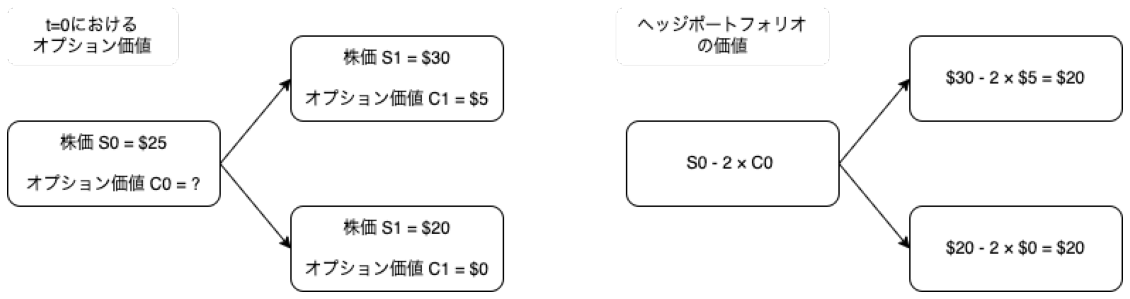

In [33]:
plt.rcParams['figure.figsize'] = (20.0, 16.0)
plt.imshow(img4_1)
plt.axis("off")
plt.show()

上記では、t=1における将来価値なのでt=0の現在価値にしたい。割引率を求める。$\\$
ポートフォリオは、株式を1株ロング、オプション2単位ショートしたものなので、リスクが内在しており、割引率もベータを用いたリスク調整済割引率を用いる必要があるように思われる。一方で、株価が上昇しても下降してもt=1におけるポートフォリオ価値は不変であり、このポートフォリオは株価変動に関して無リスクとわかる。よって、割引率として無リスク金利を用いる。(r=5%)
$$\cfrac{20}{1.05}=19.05$$
ポートフォリオの現在価値$19.05と一致するように、オプション価値を求める。
$$S0=\cfrac{1}{2}(25-19.05)=2.98$$
従って、株価変動に関して無リスクなポートフォリオを構築し、期待ペイオフを無リスク金利で割引くことによってコール・オプション価格が求まった。$\\$
言い換えると、オプション価値は、リスク中立における期待ペイオフを無リスク金利で割引くことで計算できる。（リスク中立評価の考え方）


（注）オプション価格C0を求めるのに、原資産である株式のリターンに依存していない点に注意。無リスクポートフォリオの構築、すなわちリスク中立評価においては株価の見通しについて強気な人も弱気な人もオプション価格には合意する。

公正市場価値...自由で活発に取引される市場で、売り手と買い手が進んで取引する価格。$\\$

仮に、上記オプションが＄25で売られているとすると、以下の要領で裁定取引が実現する。$\\$
オプション2単位を＄5で購入し、株式1株$25だけショート（空売り）する。するとt=0で手元に$20残り、これを無リスク金利5%で貸し付ける。（あるいは１期間後償還でクーポン5%の割引債を購入する。）t=1のとき、株価変動に依らずオプション価値は-＄20となるが、手元の＄20は＄21に増えているので、無リスクかつ自己資金無しで＄1の利益が確実に得られる。$\\$

このような裁定取引が存在しても、オプションに買い圧力、株式には売り圧力がかかるので競争的な市場では長く続かない。株価が変わらないと仮定すると、オプション価格は＄2.98に収束し、裁定取引の機会が消滅する。このように、リスク中立評価は裁定取引が存在しない価格評価であり、公正市場価格の推定値である。

（注）対照的に、割引キャッシュフロー評価（DCF評価）はリスクを適切に反映した割引率の推定が非常に困難であり、主観的な価格評価で、無裁定条件も担保されす、公正市場価格の推定値とはみなせない。

二項モデルを、満期までの期間をn期間に分割を増やしていくことで実用性を上げる。この分割を無限にしていくことで、連続モデルとなる。つまり、二項モデルは十分な分割数（通常のオプションなら60分割くらい）を取ることにより、株価の分布を近似する。$\\$
一方、BS（ブラックショールズ）モデルは連続モデルで、満期時の株価の分布を仮定してオプション価格を（正規分布の分布関数などで）解析的に求める。以降のモンテカルロ法によるオプション評価でも連続モデルを仮定するが、株価の分布をモンテカルロ・シミュレーションで数値解析的に推定し、そこからオプション価格を求める。

[0, 1, 0, -1, -2, -1, -2, -3, -4, -5, -5, -6, -5, -6, -5, -4, -5, -4, -5, -4, -5, -4, -3, -3, -2, -1, 0, 1, 1, 2, 3, 3, 4, 5, 6, 5, 6, 7, 6, 6, 5, 5, 5, 5, 4, 5, 5, 6, 6, 5, 6, 5, 6, 7, 7, 6, 5, 4, 3, 3, 2, 2, 3, 3, 2, 1, 2, 3, 4, 4, 3, 2, 3, 2, 3, 4, 3, 3, 2, 1, 0, -1, -1, -2, -2, -1, -1, -1, 0, 0, 1, 0, 1, 2, 3, 4, 3, 2, 2, 2, 3, 3, 4, 5, 6, 7, 8, 7, 6, 5, 4, 4, 4, 5, 4, 4, 3, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 1, 2, 1, 1, 2, 3, 3, 3, 4, 4, 5, 4, 5, 4, 5, 5, 4, 4, 4, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 5, 5, 6, 6, 7, 8, 7, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 7, 7, 8, 7, 7, 6, 7, 8, 7, 8, 7, 6, 5, 6, 5, 6, 7, 6, 6, 7, 6, 6, 7, 8, 7, 6, 6, 7, 6, 5, 4, 4, 5, 6, 7, 8, 9, 8, 9, 10, 9, 9, 8, 7, 7, 8, 9, 8, 9, 10, 9, 8, 9, 9, 10, 9, 8, 8, 9, 8, 9, 10, 9, 9, 8, 9, 10, 9, 10, 11, 10, 10, 10, 11, 10, 9, 10, 10, 11, 10, 9, 10, 11, 10, 11, 10, 10, 9, 8, 8, 7, 6, 7, 6, 5, 4, 3, 2, 3, 3, 2, 2, 1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 3, 4, 3, 3, 2, 3, 4, 5, 4, 4, 4, 5, 4, 5, 6, 7, 6, 6, 

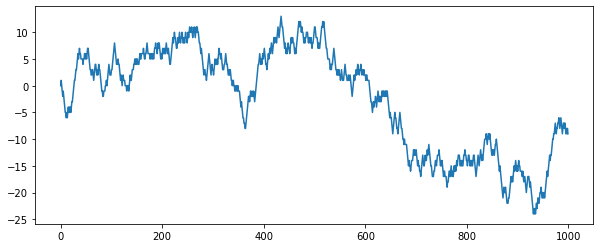

(array([ 27.,  64., 158.,  44.,  66.,  74.,  96., 214., 198.,  59.]),
 array([-24. , -20.3, -16.6, -12.9,  -9.2,  -5.5,  -1.8,   1.9,   5.6,
          9.3,  13. ]),
 <BarContainer object of 10 artists>)

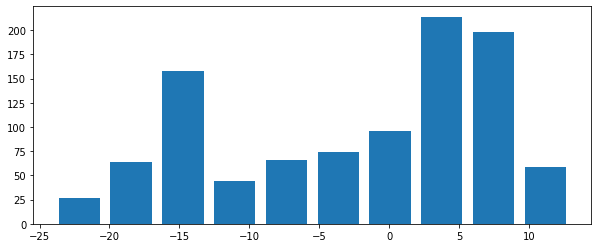

In [40]:
# 千鳥足1
n = 1000 # 歩数
x = 0 # 現在地
dir = 0 # 方向（ドリフト = 0）
ivec = []
xvec = []

for i in range(n):
    u = np.random.uniform(0,1)
    if u <= 0.4:
        x += dir - 1 # 確率0.4で右へふらつく
    elif u <= 0.6:
        x += dir # 確率0.2で真っ直ぐ
    else:
        x += dir + 1 # 確率0.4で左へふらつく
    ivec.append(i)
    xvec.append(x)

print(xvec)

plt.rcParams['figure.figsize'] = (10.0, 4.0)
plt.plot(ivec, xvec)
plt.show()
plt.hist(xvec, bins=10, rwidth=0.8)

[0.5, 0.0, 1.5, 1.0, 0.5, 2.0, 2.5, 2.0, 3.5, 3.0, 4.5, 6.0, 7.5, 7.0, 6.5, 6.0, 5.5, 7.0, 8.5, 10.0, 9.5, 11.0, 10.5, 10.0, 11.5, 13.0, 13.5, 15.0, 15.5, 16.0, 15.5, 15.0, 16.5, 16.0, 16.5, 17.0, 18.5, 18.0, 18.5, 18.0, 19.5, 19.0, 20.5, 20.0, 19.5, 19.0, 20.5, 22.0, 23.5, 23.0, 22.5, 22.0, 23.5, 25.0, 24.5, 26.0, 25.5, 25.0, 26.5, 28.0, 27.5, 29.0, 28.5, 28.0, 29.5, 30.0, 31.5, 33.0, 34.5, 34.0, 35.5, 35.0, 34.5, 36.0, 36.5, 38.0, 38.5, 38.0, 39.5, 41.0, 41.5, 43.0, 44.5, 46.0, 47.5, 48.0, 48.5, 49.0, 50.5, 52.0, 51.5, 53.0, 52.5, 52.0, 52.5, 52.0, 53.5, 54.0, 55.5, 55.0, 54.5, 55.0, 56.5, 56.0, 57.5, 59.0, 58.5, 59.0, 60.5, 60.0, 59.5, 61.0, 60.5, 60.0, 59.5, 60.0, 61.5, 61.0, 60.5, 61.0, 60.5, 62.0, 63.5, 65.0, 66.5, 68.0, 68.5, 68.0, 69.5, 71.0, 70.5, 72.0, 73.5, 75.0, 74.5, 74.0, 75.5, 77.0, 76.5, 77.0, 76.5, 78.0, 78.5, 78.0, 78.5, 79.0, 79.5, 81.0, 82.5, 82.0, 83.5, 83.0, 84.5, 84.0, 85.5, 87.0, 88.5, 90.0, 89.5, 89.0, 88.5, 88.0, 87.5, 89.0, 90.5, 90.0, 91.5, 92.0, 93.5, 93.0,

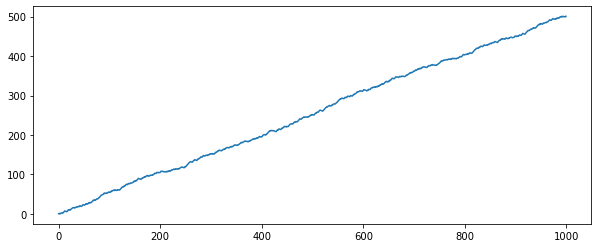

(array([ 88., 100., 109., 108.,  92.,  83., 105., 110., 109.,  96.]),
 array([  0. ,  50.1, 100.2, 150.3, 200.4, 250.5, 300.6, 350.7, 400.8,
        450.9, 501. ]),
 <BarContainer object of 10 artists>)

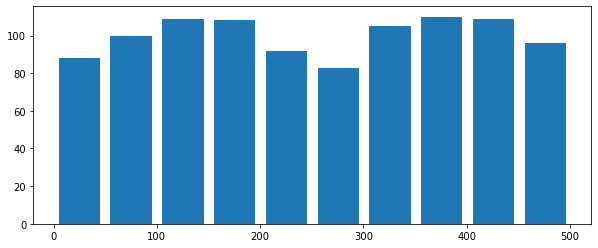

In [41]:
# 千鳥足2
n = 1000 # 歩数
x = 0 # 現在地
dir = 0.5 # 方向（ドリフト = 0.5）
ivec = []
xvec = []

for i in range(n):
    u = np.random.uniform(0,1)
    if u <= 0.4:
        x += dir - 1 # 確率0.4で右へふらつく
    elif u <= 0.6:
        x += dir # 確率0.2で真っ直ぐ
    else:
        x += dir + 1 # 確率0.4で左へふらつく
    ivec.append(i)
    xvec.append(x)

print(xvec)

plt.plot(ivec, xvec)
plt.show()
plt.hist(xvec, bins=10, rwidth=0.8)

株価プロセスのモデル化...株式にはリスク・プレミアムに見合った期待リターンがあり、通常その期待リターンに沿って一定で上昇していく。しかし、実際の市場はサプライズに溢れているので、そのサプライズも不確実性（確率）としてモデルに組み込む必要がある。

Winner過程...以下を満たす確率過程$S=S(t)$。増分を$\Delta S=\Delta S(t)=S(t+\Delta t)-S(t)=S(t+1)-S(t)$として$\\$

（1）$\Delta S=\varepsilon\sqrt{\Delta t},\ \ \ \varepsilon \sim N(0,1)\\$
（2）重複しない期間の$\Delta$は独立している。すなわち、自己相関を持たない。

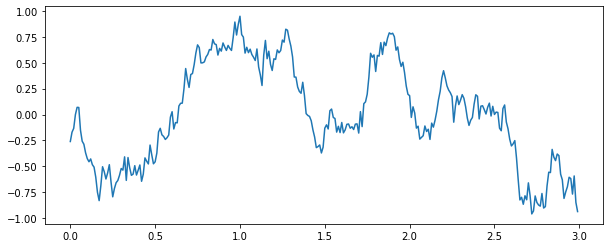

In [71]:
# Winner過程 (1-pass)
dt = 0.01
s = 0
jvec = []
svec = []
dsvec = []

for j in range(300):
    eps = np.random.normal(0,1,1)
    ds = eps * np.sqrt(dt)
    s = s + ds
    jvec.append(j*dt)
    svec.append(s)
    dsvec.append(ds)

plt.plot(jvec, svec)
plt.show()

 Winner過程では、時刻t=Tにおいて株価変動$S(T)-S(0)$が平均0、標準偏差$\sqrt{T}$の正規分布に従うという特徴がある。以下では、5000サンプルの株価サンプルが正規分布を近似している様子を表している。標準偏差が$\sqrt{3}=1.73$付近で、サンプル数を増やせばさらに近づく

平均: -0.00
標準偏差: 1.72


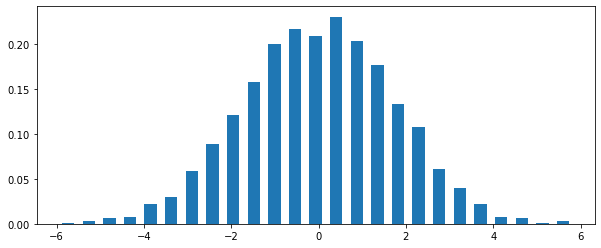

In [81]:
# Winner過程 (5000-pass)
dt = 0.01
diffvec = []

for i in range(5000):
    s = 0
    for j in range(300):    # 1-pass
        eps = np.random.normal(0,1,1)
        ds = eps * np.sqrt(dt)
        s = s + ds
        diff = s - 0
    diffvec.append(diff)

diffvec = np.array(diffvec)
mu = np.mean(diffvec)
std = np.std(diffvec)
print('平均: {0:.2f}'.format(mu))
print('標準偏差: {0:.2f}'.format(std))
plt.hist(diffvec, bins=25, rwidth=0.6, density=True)
plt.show()

一般化Winner過程...以下を満たす確率過程$S=S(t)$。上のWinner過程にドリフト項$a\Delta t$が加わったもの。$\\$

（1）$\Delta S=a\Delta t+b\varepsilon\sqrt{\Delta t},\ \ \ \varepsilon \sim N(0,1)\\$
（2）ドリフト項は期待リターンの増分。$b$はスケーリングファクター（分散率）で、株式間のリスクの違いを表現している。$\\$

このモデルは期待リターンとリスクという株式の2つの特性を反映できる点で優れているが、株価が変化すると期待リターンとリスクも変わってしまうという欠点がある。（金額ベースで表現していることが原因）

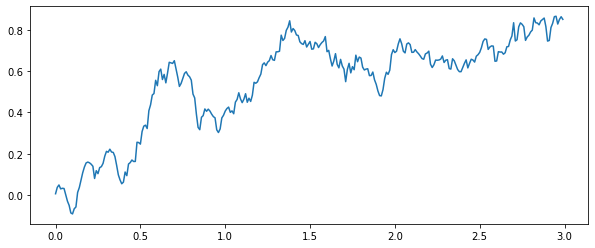

In [75]:
# 一般Winner過程 (1-pass)
dt = 0.01
s = 0
a = 0.5
b = 0.3
jvec = []
svec = []
dsvec = []

for j in range(300):
    eps = np.random.normal(0,1,1)
    ds = a * dt + b * eps * np.sqrt(dt)
    s = s + ds
    jvec.append(j*dt)
    svec.append(s)
    dsvec.append(ds)

plt.plot(jvec, svec)
plt.show()

基本株価プロセス...期待リターンとリスクを金額ベースでなく、価格に関する変化率（％）ベースで表す。
$$dS=\mu Sdt+\sigma Sdz$$
離散化すると
$$\cfrac{\Delta S}{S}=\mu \Delta t+\sigma \varepsilon\sqrt{\Delta t}$$
$$S(t+\Delta t)=S(t)+\Delta S=S(t)+\mu S\Delta t+\sigma \varepsilon S\sqrt{\Delta t}$$

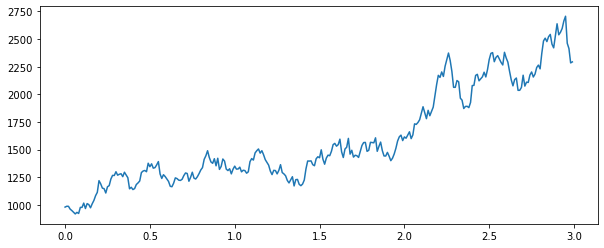

In [78]:
# 基本株価プロセス (1-pass)
dt = 0.01
s = 1000
mu = 0.1
sigma = 0.3
T = 3
jvec = []
svec = []
dsvec = []

for j in range(T*100):
    eps = np.random.normal(0,1,1)
    ds = mu * s * dt + sigma * s * eps * np.sqrt(dt)
    s = s + ds
    jvec.append(j*dt)
    svec.append(s)
    dsvec.append(ds)

plt.plot(jvec, svec)
plt.show()

（注）基本株価プロセスの解Sはマルコフ過程である。（将来の株価変動は現在の株価のみに依存し、過去の株価推移と独立している。）すなわち、テクニカル分析で超過収益を継続的に生み出すことは不可能であることを意味する。（マルコフ過程とウィークフォームの市場効率性は整合的である。）

平均: 1330.50
標準偏差: 697.53


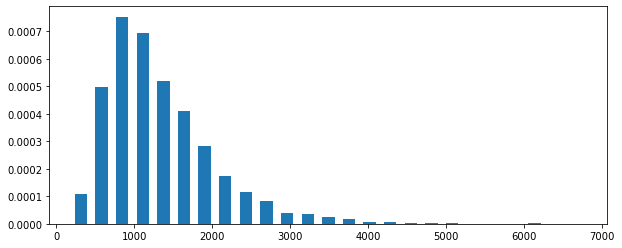

In [79]:
# 基本株価プロセス (5000-pass)
dt = 0.01
mu = 0.1
sigma = 0.3
T = 3
diffvec = []

for i in range(5000):
    s = 1000
    for j in range(T*100):    # 1-pass
        eps = np.random.normal(0,1,1)
        ds = mu * s * dt + sigma * s * eps * np.sqrt(dt)
        s = s + ds
        diff = s - 0
    diffvec.append(diff)

diffvec = np.array(diffvec)
mu = np.mean(diffvec)
std = np.std(diffvec)
print('平均: {0:.2f}'.format(mu))
print('標準偏差: {0:.2f}'.format(std))
plt.hist(diffvec, bins=25, rwidth=0.6, density=True)
plt.show()

（注）基本株価プロセスの解Sは正規分布でなく右裾が長い分布に従う。（対数正規分布）$\\$
株価には下限はあるが上限がないため、期間Tが長くなると高い株価が出現する確率が上がる。その結果スキューも大きくなる。$\\$
リターンは正規分布に従うが、株価は対数正規分布に従う。

連続複利リターン...基本株価プロセスでは、微小期間における期待リターンは$\mu$であるが、長い期間における期待連続複利リターンは$\mu-\cfrac{\sigma^2}{2}$となる。$\\$
以下では、期待リターンは$\mu$=10%であるが、長い期間における期待連続複利リターンは$\mu-\cfrac{\sigma^2}{2}$=5.5%となっている。

In [85]:
# 連続福利リターン（Euler法）
dt = 0.0833 # 1ヶ月（1/12年）
mu = 0.1
sigma = 0.3
T = 10
N = 1000000
ret = 0
jvec = []
svec = []
dsvec = []

for i in range(N):
    s = 100
    for j in range(int(T/dt)):
        eps = np.random.normal(0,1,1)
        ds = mu * s * dt + sigma * s * eps * np.sqrt(dt)
        s = s + ds
    ret = ret + np.log(s/100)

ret2 = ret / N / T
print(ret2)

[0.05475304]


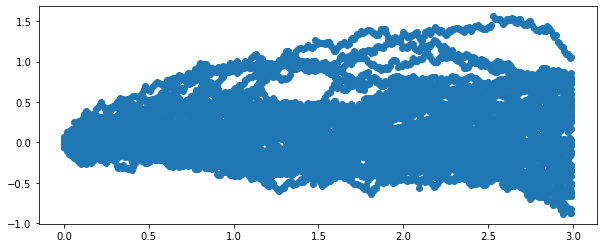

In [199]:
# 時間と不確実性
dt = 0.01
jvec = []
svec = []
diffvec = []
T = 3

for i in range(50):
    s = 0
    for j in range(T*100):    # 1-pass
        eps = np.random.normal(0,1,1)
        ds = mu * dt + sigma * eps * np.sqrt(dt)
        # ds = eps * np.sqrt(dt)
        s = s + ds
        diff = s - 0
        jvec.append(j*dt)
        svec.append(s)
        diffvec.append(diff)

# diffvec = np.array(diffvec)
# plt.hist(diffvec, bins=25, rwidth=0.6, density=True)
plt.scatter(jvec, diffvec)
plt.show()

モンテカルロ法のステップ$\\$

Step1.基本株価プロセスを用いて、満期時の株価を求める。$\\$
Step2.満期時のオプションのペイオフを計算する。$\\$
Step3.上記Step1〜Step2を繰り返して、オプションの期待ペイオフを推定する。$\\$
Step4.期待ペイオフを無リスク金利で割引く。$\\$


ブラックショールズ（BS）モデル...BS方程式から導出されるオプション価格は以下のようになる。
$$Call(S_0,K,r,T,\sigma)=S_0N(d_1)-Ke^{-rT}N(d_2)$$
$$Put(S_0,K,r,T,\sigma)=Ke^{-rT}N(-d_2)-S_0N(-d_1)$$
ただし、
$$d_1=\cfrac{\ln(S_0/K)+(r+\sigma^2/2)T}{\sigma\sqrt{T}},\ \ d_2=d_1-\sigma\sqrt{T}$$


In [140]:
# 解析解を用いたオプション価格
class BS_Model:

    def __init__(self, s0, K, r, T, sigma):
        self.s0 = s0
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma

    def Call(self, s0, K, r, T, sigma):
        self.s0 = s0
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma

        d1 = (np.log(s0/K)+(r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        call = s0 * stats.norm.cdf(d1,0,1) - K * np.exp(-r*T) * stats.norm.cdf(d2,0,1)
        return call
    
    def Put(self, s0, K, r, T, sigma):
        self.s0 = s0
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma

        d1 = (np.log(s0/K)+(r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        put =  K * np.exp(-r*T) * stats.norm.cdf(-d2,0,1) - s0 * stats.norm.cdf(-d1,0,1)
        return put


In [141]:
s0 = 100
K = 100
r = 0.05
T = 1
sigma = 0.3

BS = BS_Model(s0, K, r, T, sigma)

C = BS.Call(s0, K, r, T, sigma)
print(f'Call = {C}')

P = BS.Put(s0, K, r, T, sigma)
print(f'Put = {P}')

Call = 14.231254785985819
Put = 9.354197236057232


In [173]:
# Euler法によるモンテカルロ法
class BS_Monte_Carlo_Euler:
    def __init__(self, s0, mu, sigma, dt, n, N):
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.n = n  # n = T /dt
        self.N = N
    
    def Price_Euler(self, s0, mu, sigma, dt, n=50):
        s = s0
        for i in range(n):
            eps = np.random.normal(0,1,1)
            ds = mu * s * dt + sigma * s * eps * np.sqrt(dt)
            s = s + ds
        return s
    
    def MC_Call_Euler(self, s0, K, r, T, mu, sigma, dt, n, N):
        Payoff = 0
        for i in range(N):
            s = self.Price_Euler(s0, mu, sigma, dt, n)
            dPayoff = max(s-K, 0)
            Payoff = Payoff + dPayoff
        mean_Payoff = Payoff / N
        MC_call = mean_Payoff * np.exp(-r * T)
        return MC_call
    
    def MC_Put_Euler(self, s0, K, r, T, mu, sigma, dt, n, N):
        Payoff = 0
        for i in range(N):
            s = self.Price_Euler(s0, mu, sigma, dt, n)
            dPayoff = max(K-s, 0)   # callの逆
            Payoff = Payoff + dPayoff
        mean_Payoff = Payoff / N
        MC_put = mean_Payoff * np.exp(-r * T)
        return MC_put

In [197]:
s0 = 100
K = 100
r = 0.05
T = 1
mu = r
sigma = 0.3
n = 50
dt = T/n
N =10000

BS = BS_Monte_Carlo_Euler(s0, mu, sigma, dt, n, N)

C = BS.MC_Call_Euler(s0, K, r, T, mu, sigma, dt, n, N)
print(f'MC_Call = {C}')

P = BS.MC_Put_Euler(s0, K, r, T, mu, sigma, dt, n, N)
print(f'MC_Put = {P}')


MC_Call = [14.63093612]
MC_Put = [9.18481704]


正確な離散化...上では株価を求めるとき、初期値から$\Delta t$ずつ株価を発生させて満期時の株価を推定するEuler法を用いた。しかし、伊藤の公式を用いて対数変化した株価を離散化した方がより正確で計算も速い。伊藤の公式から
$$d\lg S(t)=\left(\mu-\cfrac{\sigma^2}{2}\right)dt+\sigma dZ(t)$$
離散化すると
$$\lg S(t+\Delta t)-\lg S(t)=\left(\mu-\cfrac{\sigma^2}{2}\right)\Delta t+\sigma \varepsilon\sqrt{\Delta t}$$
よって、以下を得る。
$$S(t+\Delta t)=S(t)\exp\left[\left(\mu-\cfrac{\sigma^2}{2}\right)\Delta t+\sigma \varepsilon\sqrt{\Delta t}\right]$$

（注）オプション評価のモデリングにおいて、基本的に確率過程が非常に複雑で、正確な離散化の導入が困難であることが多い。それに比べて、Euler法は正確性に劣るものの、確率微分方程式さえ記述できれば推定が容易である。

In [191]:
# 正確な離散化よるモンテカルロ法
class BS_Monte_Carlo:
    def __init__(self, s0, mu, sigma, dt, N):
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.N = N
    
    def Price(self, s0, mu, sigma, dt):
        eps = np.random.normal(0,1,1)
        s = s0 * np.exp((mu - (sigma**2) / 2 ) * dt + sigma * eps * np.sqrt(dt))
        return s
    
    def MC_Call(self, s0, K, r, T, mu, sigma, dt, N):
        Payoff = 0
        for i in range(N):
            s = self.Price(s0, mu, sigma, dt)
            dPayoff = max(s-K, 0)
            Payoff = Payoff + dPayoff
        mean_Payoff = Payoff / N
        MC_call = mean_Payoff * np.exp(-r * T)
        return MC_call
    
    def MC_Put(self, s0, K, r, T, mu, sigma, dt, N):
        Payoff = 0
        for i in range(N):
            s = self.Price(s0, mu, sigma, dt)
            dPayoff = max(K-s, 0)   # callの逆
            Payoff = Payoff + dPayoff
        mean_Payoff = Payoff / N
        MC_put = mean_Payoff * np.exp(-r * T)
        return MC_put

In [198]:
s0 = 100
K = 100
r = 0.05
T = 1
mu = r
sigma = 0.3
n = 1
dt = T/n
N =1000

BS = BS_Monte_Carlo(s0, mu, sigma, dt, N)

C = BS.MC_Call(s0, K, r, T, mu, sigma, dt, N)
print(f'MC_Call = {C}')

P = BS.MC_Put(s0, K, r, T, mu, sigma, dt, N)
print(f'MC_Put = {P}')


MC_Call = [13.48329891]
MC_Put = [9.15213369]
